<a href="https://colab.research.google.com/github/deillafuadah/supervised_ML/blob/main/Credit_Risk_Approval_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#Import model library
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report
#Import library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
root='/content/gdrive/MyDrive/Machine Learning DSC/Supervised_CreditRisk/file_study_case-1655116056535/Credit Risk Dataset/'

In [ ]:
df_credit =pd.read_csv(root+'credit_history.csv')
df_application =pd.read_csv(root+'application_history.csv')
df_dtest=pd.read_csv(root+'data_test.csv')

#**Preprocessing**




#df_application

In [ ]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438456 entries, 0 to 438455
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          438456 non-null  int64  
 1   JK                   438456 non-null  object 
 2   KepemilikanMobil     438456 non-null  object 
 3   KepemilikanProperti  438456 non-null  object 
 4   JmlAnak              438456 non-null  int64  
 5   Pendapatan           438456 non-null  float64
 6   TipePendapatan       438456 non-null  object 
 7   TingkatPendidikan    438456 non-null  object 
 8   StatusKeluarga       438456 non-null  object 
 9   TipeRumah            438456 non-null  object 
 10  FlagMobile           438456 non-null  int64  
 11  FlagWorkPhone        438456 non-null  int64  
 12  FlagPhone            438456 non-null  int64  
 13  Email                438456 non-null  int64  
 14  Pekerjaan            304213 non-null  object 
 15  JmlAnggotaKeluarg

In [ ]:
df_application.describe()

,Id_customer,JmlAnak,Pendapatan,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience
count,4.384560e+05,438456.000000,4.384560e+05,438456.0,438456.000000,438456.000000,438456.000000,438456.000000,438456.000000,438456.000000
mean,6.022392e+06,0.427363,1.875187e+05,1.0,0.206080,0.287778,0.108278,2.194423,43.834973,177.988247
std,5.715402e+05,0.724867,1.100668e+05,0.0,0.404489,0.452728,0.310731,0.897213,11.473102,374.967702
min,5.008804e+06,0.000000,2.610000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,5.609478e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,34.000000,3.000000
50%,6.047816e+06,0.000000,1.606050e+05,1.0,0.000000,0.000000,0.000000,2.000000,43.000000,7.000000
75%,6.457021e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,53.000000,16.000000
max,7.999952e+06,19.000000,6.750000e+06,1.0,1.000000,1.000000,1.000000,20.000000,69.000000,1001.000000


In [ ]:
df_application.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id_customer           0.212603
JmlAnak               1.806773
Pendapatan            8.835991
FlagMobile            0.000000
FlagWorkPhone         1.453297
FlagPhone             0.937530
Email                 2.521306
JmlAnggotaKeluarga    0.919550
Age                   0.159817
Experience            1.738623
dtype: float64

In [ ]:
## Statistika per kolom
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9,9 ))
        ax=sns.countplot(y=df_application[feature], hue='JK' , data=df_application)
        plt.legend(loc='best')
        total = len(df_application[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

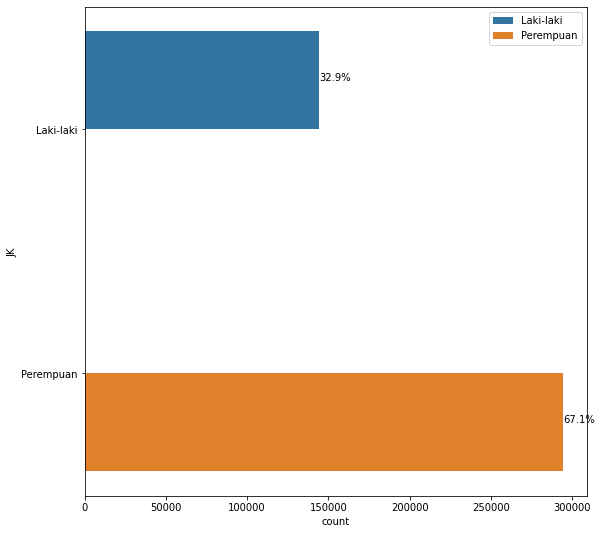

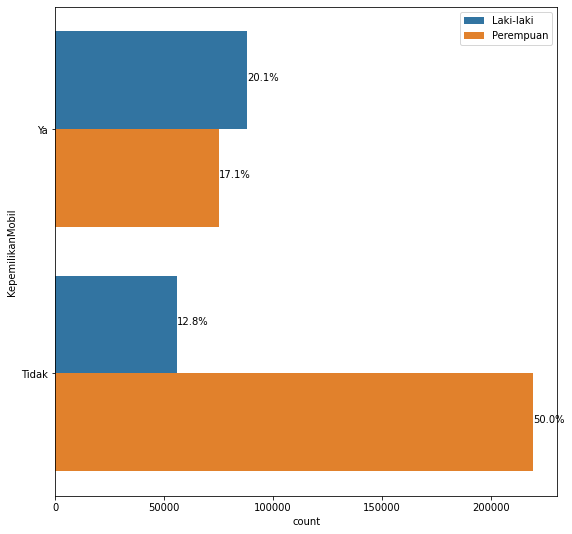

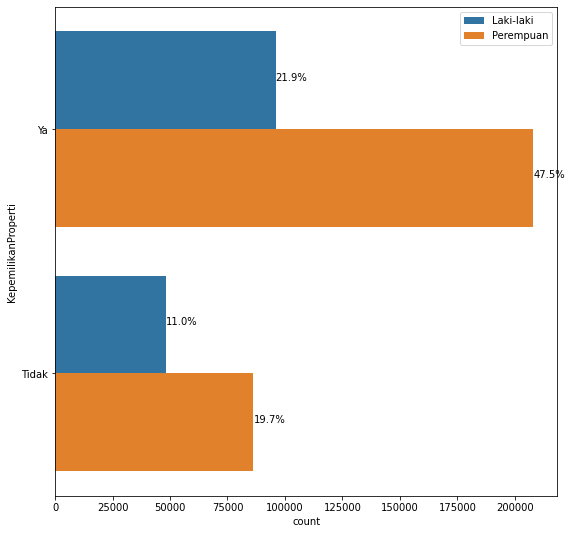

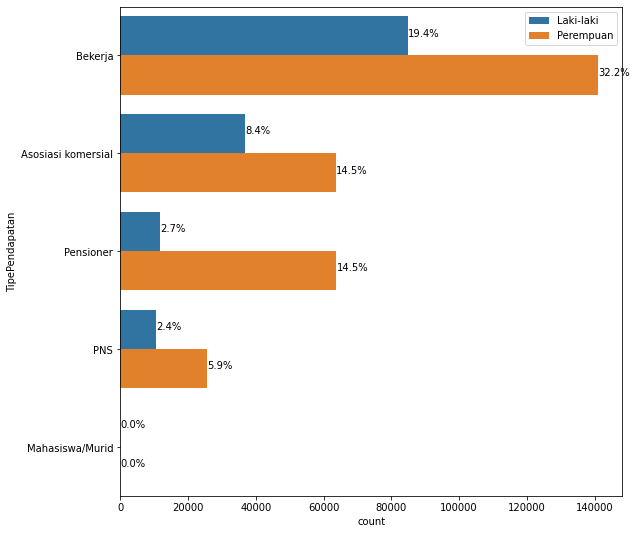

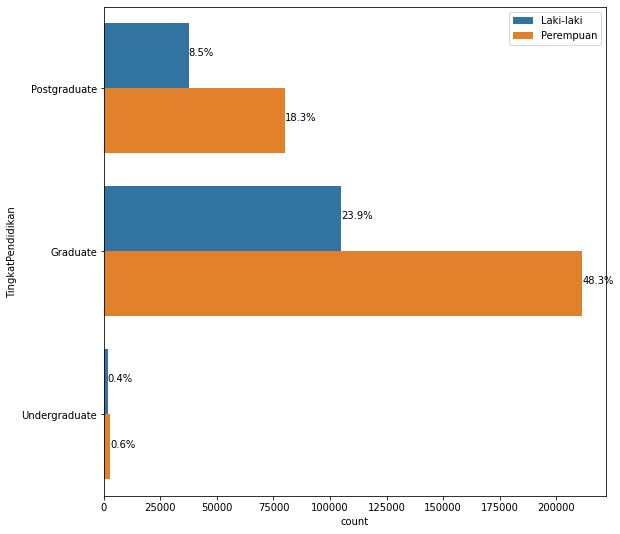

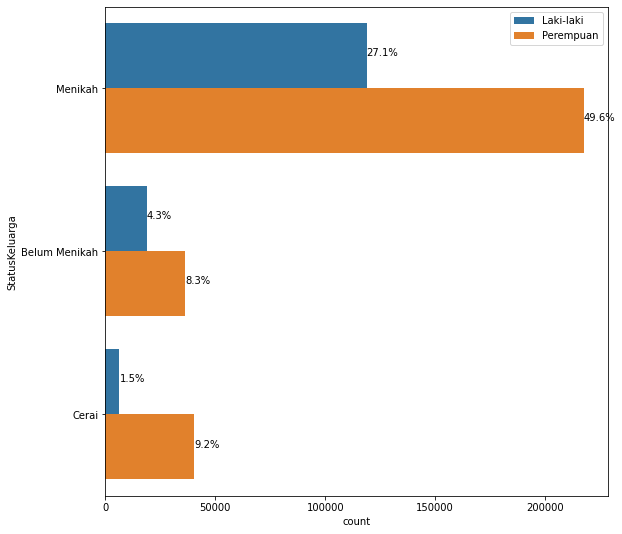

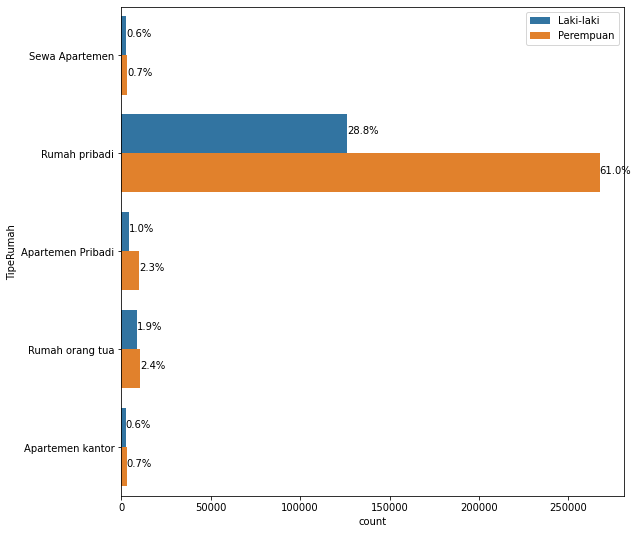

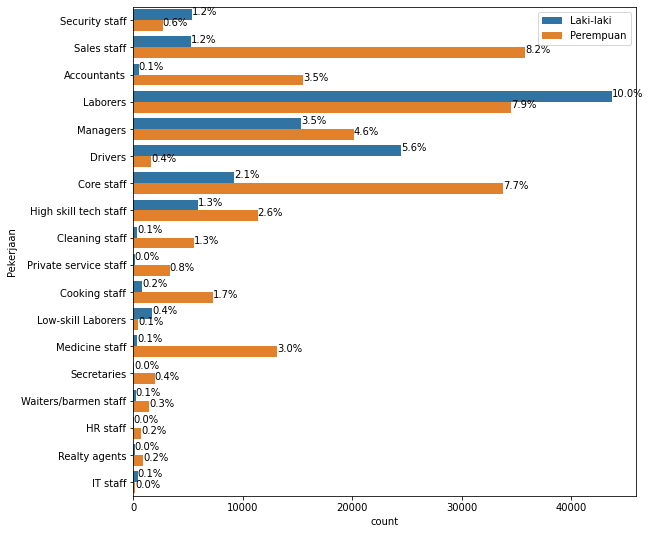

In [ ]:
countplot_applicants(['JK', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan', 'TingkatPendidikan', 'StatusKeluarga', 'TipeRumah', 'Pekerjaan'])

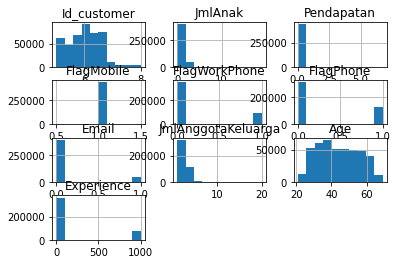

In [ ]:
##cek distribusi data
df_application.hist()
plt.show()


In [ ]:
## cek missing value

df_application.isna().sum()

Id_customer                 0
JK                          0
KepemilikanMobil            0
KepemilikanProperti         0
JmlAnak                     0
Pendapatan                  0
TipePendapatan              0
TingkatPendidikan           0
StatusKeluarga              0
TipeRumah                   0
FlagMobile                  0
FlagWorkPhone               0
FlagPhone                   0
Email                       0
Pekerjaan              134243
JmlAnggotaKeluarga          0
Age                         0
Experience                  0
dtype: int64

In [ ]:
def countplot_occupation(features):
    for feature in features:
        plt.figure(figsize=(30, 30))
        ax=sns.countplot(y=df_application[feature], hue='TingkatPendidikan' , data=df_application)
        plt.legend(loc='best')
        total = len(df_application[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

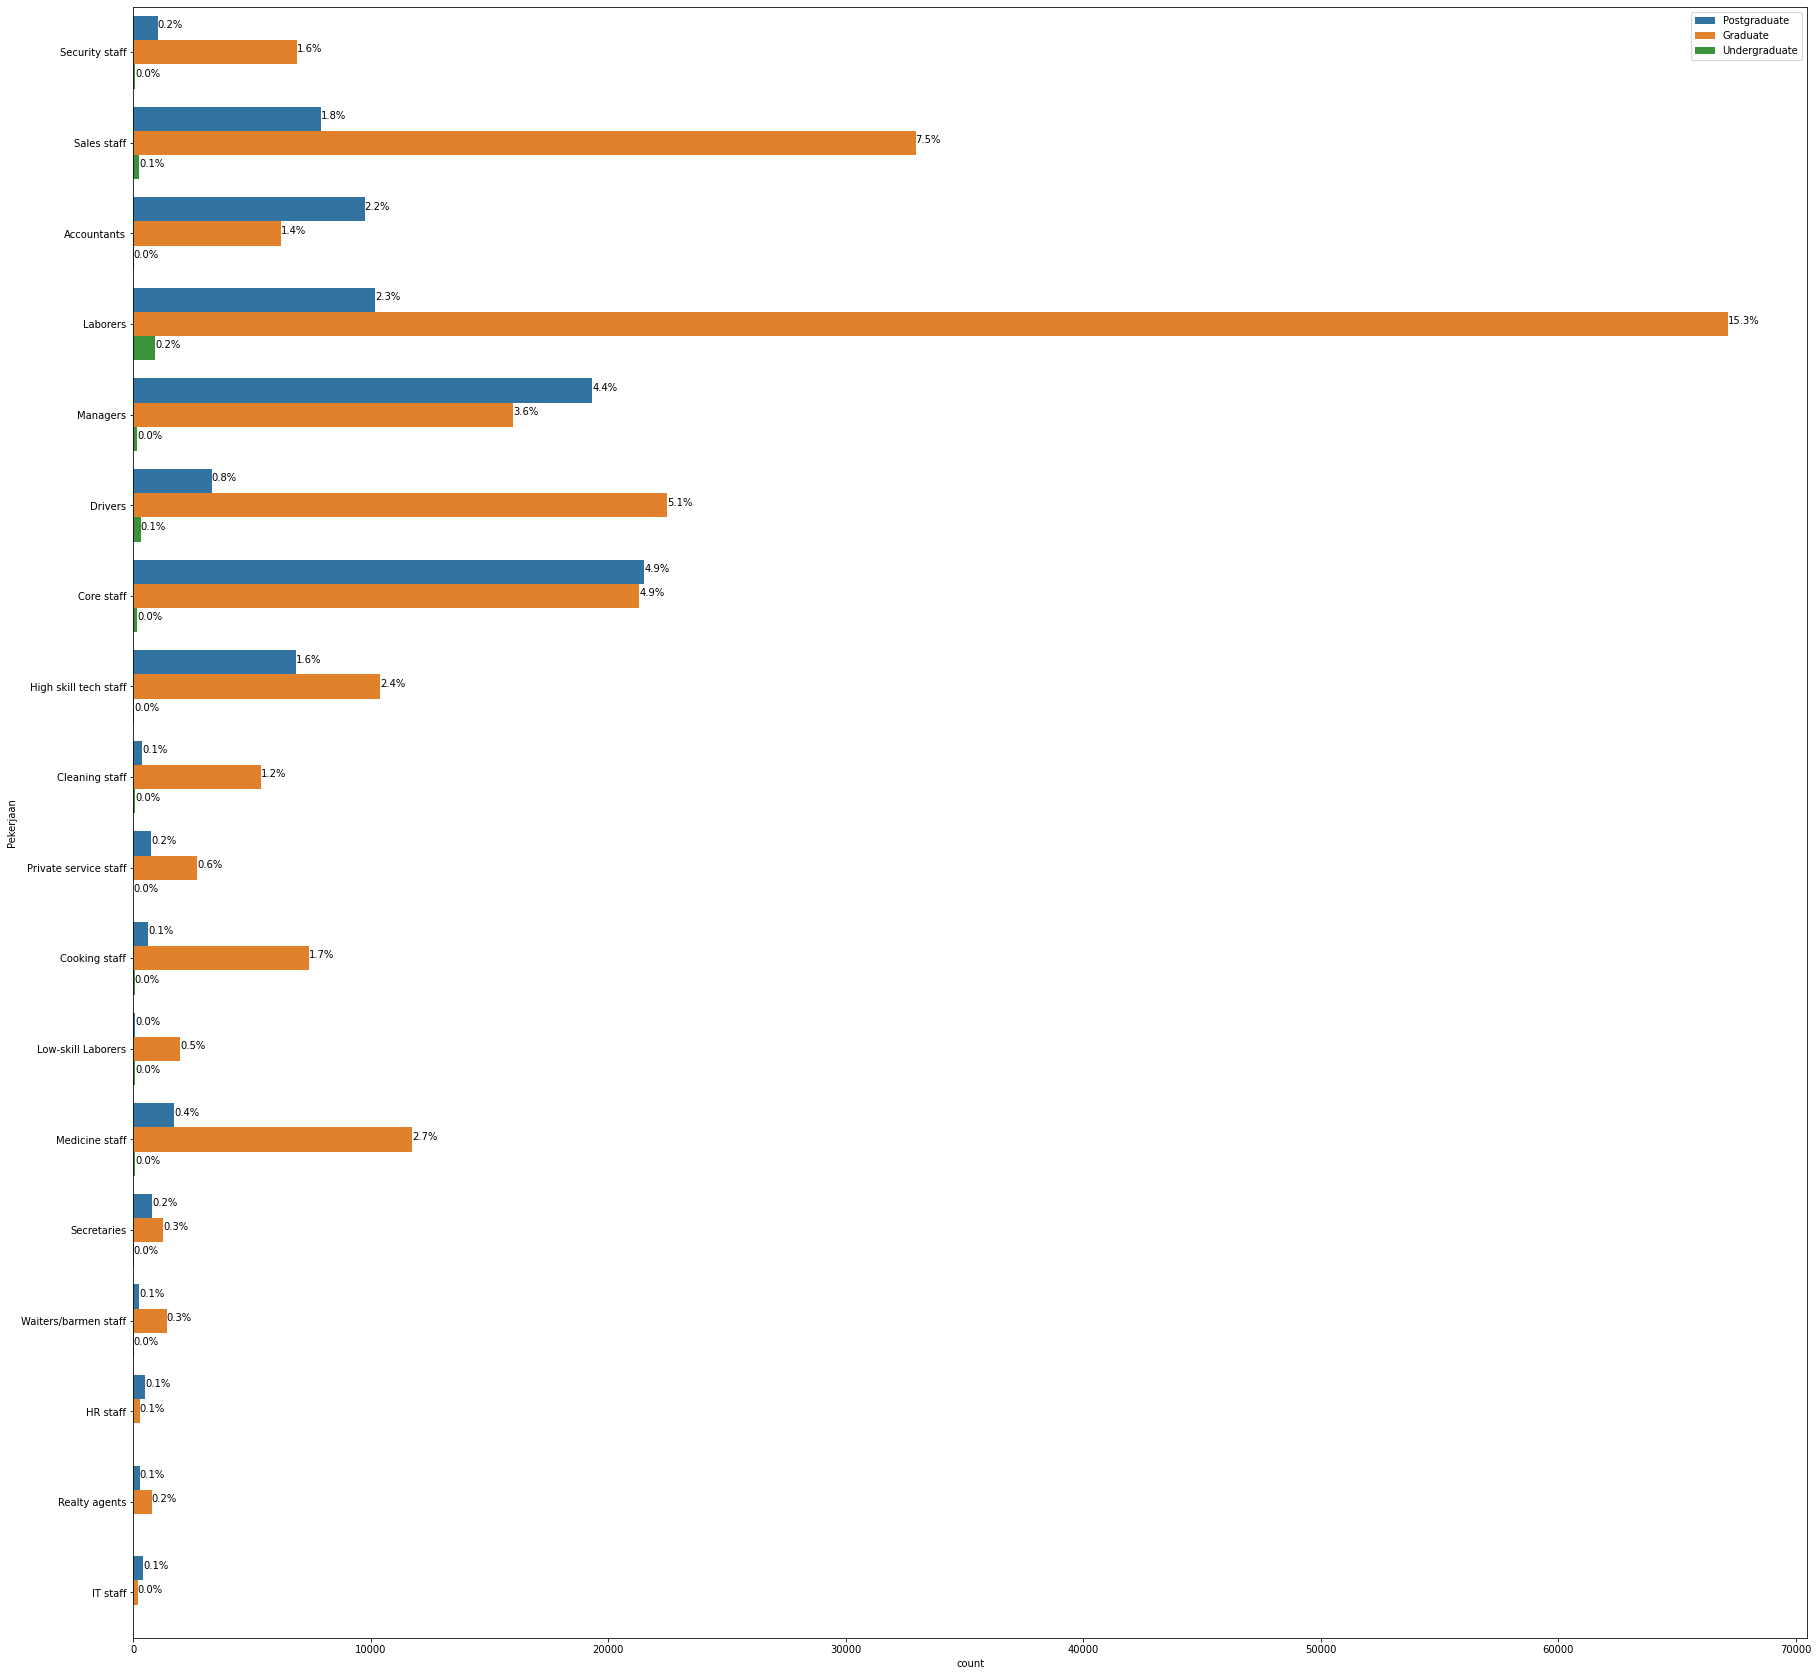

In [ ]:
countplot_occupation(['Pekerjaan'])

In [ ]:
def occupation_by_education_by_gender(occupations, educations, genders, length):
    Gender = []
    Education = []
    Occupation = []
    Percentage = []
    for gender in genders:
        for education in educations:
            for occupation in occupations:
                Gender.append(gender)
                Education.append(education)
                Occupation.append(occupation)
                temp_df_1=df_application.loc[df_application['Pekerjaan'] == occupation]
                temp_df_2=temp_df_1.loc[temp_df_1['JK'] == gender]
                temp_df_3=temp_df_2.loc[temp_df_2['TingkatPendidikan'] == education]
                length_filter = len(temp_df_3)
                Percentage.append(length_filter/length)
    percent_dict={
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'Popularity Percentage': Percentage
    }
    df = pd.DataFrame(percent_dict)
    df.to_excel('Occupation_popularity_index.xlsx', index=False)
                
                

In [ ]:
occupation_by_education_by_gender(list(df_application['Pekerjaan'].unique()), list(df_application['TingkatPendidikan'].unique()), list(df_application['JK'].unique()), len(df_application))

In [ ]:
occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')

In [ ]:
occupation_popularity['Tag'] = occupation_popularity['Gender']+ '_' + occupation_popularity['Education']

In [ ]:
def Dict(data):
    tag_list=list(data['Tag'].unique())
    popular_occupation = []
    data_grouped = data.groupby('Tag')
    for tag in tag_list:
        grouped_data = data_grouped.get_group(tag)
        popular_occupation.append(grouped_data.loc[grouped_data['Popularity Percentage'] == max(list(grouped_data['Popularity Percentage']))]['Occupation'].tolist()[0])
    Tag_dict={
        'Tag': tag_list,
        'Occupation': popular_occupation
    }
    return Tag_dict

In [ ]:
dict_df = Dict(occupation_popularity)

In [ ]:
pd.DataFrame(dict_df).to_excel('Tag_vs_Occupation.xlsx', index=False)

In [ ]:
tag_data = pd.read_excel('Tag_vs_Occupation.xlsx')

In [ ]:
tag_data

,Tag,Occupation
0,Laki-laki_Postgraduate,Managers
1,Laki-laki_Graduate,Laborers
2,Laki-laki_Undergraduate,Laborers
3,Perempuan_Postgraduate,Core staff
4,Perempuan_Graduate,Laborers
5,Perempuan_Undergraduate,Laborers


In [ ]:
tag_g = list(tag_data['Tag'])
occu_g = list(tag_data['Occupation'])
tag_dict = {}
for index in range(len(tag_g)):
    tag_dict[tag_g[index]] = occu_g[index]

In [ ]:
tag_dict

{'Laki-laki_Graduate': 'Laborers',
 'Laki-laki_Postgraduate': 'Managers',
 'Laki-laki_Undergraduate': 'Laborers',
 'Perempuan_Graduate': 'Laborers',
 'Perempuan_Postgraduate': 'Core staff',
 'Perempuan_Undergraduate': 'Laborers'}

In [ ]:
df_application['Tag'] = df_application['JK']+ '_' + df_application['TingkatPendidikan']

In [ ]:
def Replace_nan_occupation(df):
    for key in tag_dict:
        if df['Tag'] == key and pd.isnull(df['Pekerjaan']):
            df['Pekerjaan'] = tag_dict[key]
    return df

In [ ]:
len(df_application)

438456

In [ ]:
df_application = df_application.apply(Replace_nan_occupation, axis=1)

In [ ]:
len(df_application)

438456

In [ ]:
df_application.isnull().sum()

Id_customer            0
JK                     0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Pekerjaan              0
JmlAnggotaKeluarga     0
Age                    0
Experience             0
Tag                    0
dtype: int64

In [ ]:
## Encoding Categorical Columns
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(df_application[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        df_application.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [ ]:
categorical_features = ['JK', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan', 'TingkatPendidikan', 'StatusKeluarga', 'TipeRumah', 'Pekerjaan']
Cat_to_Num(categorical_features)

JK --> {'Laki-laki': 0, 'Perempuan': 1}
KepemilikanMobil --> {'Tidak': 0, 'Ya': 1}
KepemilikanProperti --> {'Tidak': 0, 'Ya': 1}
TipePendapatan --> {'Asosiasi komersial': 0, 'Bekerja': 1, 'Mahasiswa/Murid': 2, 'PNS': 3, 'Pensioner': 4}
TingkatPendidikan --> {'Graduate': 0, 'Postgraduate': 1, 'Undergraduate': 2}
StatusKeluarga --> {'Belum Menikah': 0, 'Cerai': 1, 'Menikah': 2}
TipeRumah --> {'Apartemen Pribadi': 0, 'Apartemen kantor': 1, 'Rumah orang tua': 2, 'Rumah pribadi': 3, 'Sewa Apartemen': 4}
Pekerjaan --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17}


In [ ]:
df_application.head(10)

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Tag
0,5008804,0,1,1,0,427500.0,1,1,2,4,1,1,0,0,10,2.0,33.0,12.0,Laki-laki_Postgraduate
1,5008805,0,1,1,0,427500.0,1,1,2,4,1,1,0,0,10,2.0,33.0,12.0,Laki-laki_Postgraduate
2,5008806,0,1,1,0,112500.0,1,0,2,3,1,0,0,0,16,2.0,59.0,3.0,Laki-laki_Graduate
3,5008808,1,0,1,0,270000.0,0,0,0,3,1,0,1,1,14,1.0,52.0,8.0,Perempuan_Graduate
4,5008809,1,0,1,0,270000.0,0,0,0,3,1,0,1,1,14,1.0,52.0,8.0,Perempuan_Graduate
5,5008810,1,0,1,0,270000.0,0,0,0,3,1,0,1,1,14,1.0,52.0,8.0,Perempuan_Graduate
6,5008811,1,0,1,0,270000.0,0,0,0,3,1,0,1,1,14,1.0,52.0,8.0,Perempuan_Graduate
7,5008812,1,0,1,0,283500.0,4,1,1,3,1,0,0,0,3,1.0,62.0,1001.0,Perempuan_Postgraduate
8,5008813,1,0,1,0,283500.0,4,1,1,3,1,0,0,0,3,1.0,62.0,1001.0,Perempuan_Postgraduate
9,5008814,1,0,1,0,283500.0,4,1,1,3,1,0,0,0,3,1.0,62.0,1001.0,Perempuan_Postgraduate


<Figure size 4320x4320 with 0 Axes>

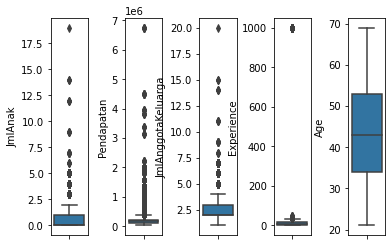

In [ ]:
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 5)
sns.boxplot(y=df_application["JmlAnak"], ax=axes[0])
sns.boxplot(y=df_application["Pendapatan"], ax=axes[1])
sns.boxplot(y=df_application["JmlAnggotaKeluarga"], ax=axes[2])
sns.boxplot(y=df_application["Experience"], ax=axes[3])
sns.boxplot(y=df_application["Age"], ax=axes[4])
plt.subplots_adjust(wspace=1)

In [ ]:
from scipy import stats
df_application=df_application[(np.abs(stats.zscore(df_application[['JmlAnak','JmlAnggotaKeluarga','Experience','Pendapatan']])) < 3).all(axis=1)]

In [ ]:
sc = MinMaxScaler()
df_application[['JmlAnak','JmlAnggotaKeluarga','Experience','Pendapatan','Age']] = sc.fit_transform(df_application[['JmlAnak','JmlAnggotaKeluarga','Experience','Pendapatan','Age']])
df_application.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Tag
0,5008804,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,Laki-laki_Postgraduate
1,5008805,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,Laki-laki_Postgraduate
2,5008806,0,1,1,0.0,0.175824,1,0,2,3,1,0,0,0,16,0.333333,0.791667,0.002997,Laki-laki_Graduate
3,5008808,1,0,1,0.0,0.496337,0,0,0,3,1,0,1,1,14,0.000000,0.645833,0.007992,Perempuan_Graduate
4,5008809,1,0,1,0.0,0.496337,0,0,0,3,1,0,1,1,14,0.000000,0.645833,0.007992,Perempuan_Graduate


#df_credit

In [ ]:
df_credit.head()

,Id_customer,Overdue
0,5001711,Tidak memiliki pinjaman
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0


In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043986 entries, 0 to 1043985
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Id_customer  1043986 non-null  int64 
 1   Overdue      1043986 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.9+ MB


In [ ]:
df_credit.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id_customer    0.164622
dtype: float64

In [ ]:
## Satistika per kolom
def countplot_credit(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=df_credit[feature], data=df_credit)
        total = len(df_credit[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

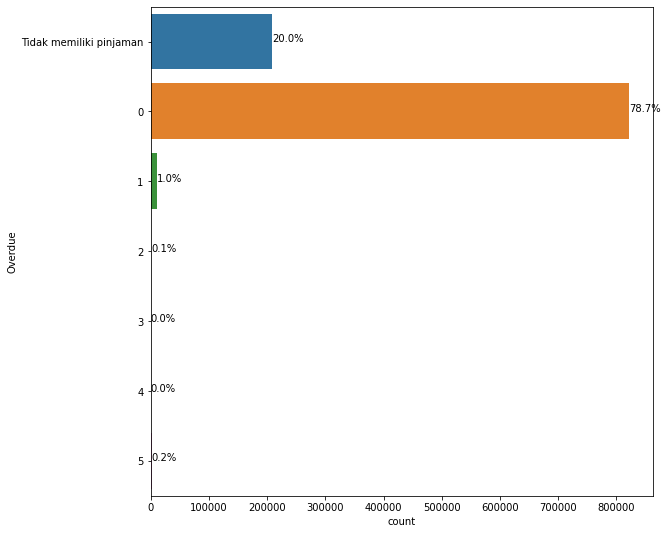

In [ ]:
countplot_credit(['Overdue'])

In [ ]:
df_credit['Overdue'].value_counts()

0                          821230
Tidak memiliki pinjaman    208755
1                           10936
5                            1677
2                             849
3                             317
4                             222
Name: Overdue, dtype: int64

In [ ]:
convert_to = {'Tidak memiliki pinjaman' : 'Good_Debt', '0' : 'Good_Debt', '1' :'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
df_credit.replace({'Overdue' : convert_to}, inplace=True)

In [ ]:
df_credit = df_credit.value_counts(subset=['Id_customer', 'Overdue']).unstack(fill_value=0)

In [ ]:
df_credit.head()

Overdue,Bad_Debt,Good_Debt,Neutral_Debt
Id_customer,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0


In [ ]:
df_credit.loc[(df_credit['Good_Debt'] > df_credit['Bad_Debt']), 'Credit_Status'] = 0
df_credit.loc[(df_credit['Good_Debt'] > df_credit['Neutral_Debt']), 'Credit_Status'] = 0
df_credit.loc[(df_credit['Neutral_Debt'] > df_credit['Good_Debt']), 'Credit_Status'] = 1
df_credit.loc[(df_credit['Neutral_Debt'] > df_credit['Bad_Debt']), 'Credit_Status'] = 1
df_credit.loc[(df_credit['Bad_Debt'] > df_credit['Good_Debt']), 'Credit_Status'] = 1
df_credit.loc[(df_credit['Bad_Debt'] > df_credit['Neutral_Debt']), 'Credit_Status'] = 1


In [ ]:
df_credit['Credit_Status'].value_counts()

0.0    40544
1.0     5241
Name: Credit_Status, dtype: int64

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45785 entries, 5001711 to 5150487
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bad_Debt       45785 non-null  int64  
 1   Good_Debt      45785 non-null  int64  
 2   Neutral_Debt   45785 non-null  int64  
 3   Credit_Status  45785 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.7 MB


In [ ]:
df_credit['Credit_Status'] = df_credit['Credit_Status'].astype('int')

In [ ]:
df_credit.head()

Overdue,Bad_Debt,Good_Debt,Neutral_Debt,Credit_Status
Id_customer,,,,
5001711,0,4,0,0
5001712,0,19,0,0
5001713,0,22,0,0
5001714,0,15,0,0
5001715,0,60,0,0


In [ ]:
df_credit.drop(['Bad_Debt','Good_Debt','Neutral_Debt'], axis=1, inplace=True)

In [ ]:
df_credit.sample(8)

Overdue,Credit_Status
Id_customer,
5142983,0
5005489,0
5118280,1
5001908,0
5146517,0
5005734,1
5029121,0
5009851,0


#Merged

In [ ]:
df_final = df_application.merge(df_credit, how='inner', on=['Id_customer'])

In [ ]:
df_final.head(10)

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Tag,Credit_Status
0,5008804,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,Laki-laki_Postgraduate,1
1,5008805,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,Laki-laki_Postgraduate,1
2,5008805,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,Laki-laki_Postgraduate,1
3,5008806,0,1,1,0.0,0.175824,1,0,2,3,1,0,0,0,16,0.333333,0.791667,0.002997,Laki-laki_Graduate,0
4,5008808,1,0,1,0.0,0.496337,0,0,0,3,1,0,1,1,14,0.000000,0.645833,0.007992,Perempuan_Graduate,0
5,5008809,1,0,1,0.0,0.496337,0,0,0,3,1,0,1,1,14,0.000000,0.645833,0.007992,Perempuan_Graduate,0
6,5008810,1,0,1,0.0,0.496337,0,0,0,3,1,0,1,1,14,0.000000,0.645833,0.007992,Perempuan_Graduate,0
7,5008811,1,0,1,0.0,0.496337,0,0,0,3,1,0,1,1,14,0.000000,0.645833,0.007992,Perempuan_Graduate,0
8,5008812,1,0,1,0.0,0.523810,4,1,1,3,1,0,0,0,3,0.000000,0.854167,1.000000,Perempuan_Postgraduate,0
9,5008812,1,0,1,0.0,0.523810,4,1,1,3,1,0,0,0,3,0.000000,0.854167,1.000000,Perempuan_Postgraduate,0


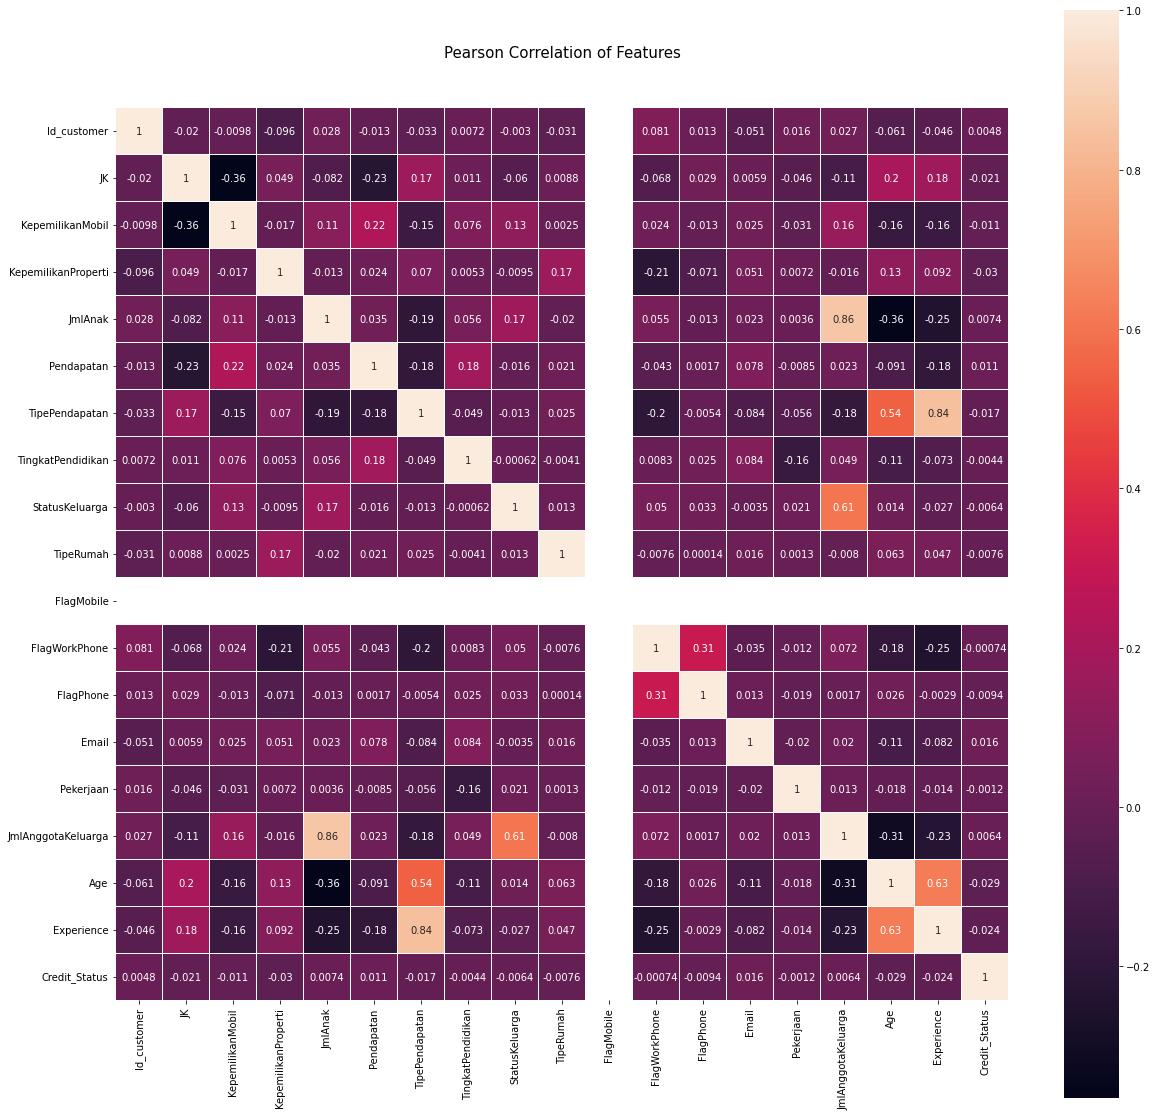

In [ ]:
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_final.corr(),linewidths=0.1,vmax=1.0, square=True,  linecolor='white', annot=True)

In [ ]:
credit_approval_data = df_final.drop('Id_customer', axis=1, inplace=False)

In [ ]:
credit_approval_data = df_final.drop('Tag', axis=1, inplace=False)

In [ ]:
credit_approval_data

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Credit_Status
0,5008804,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,1
1,5008805,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,1
2,5008805,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,1
3,5008806,0,1,1,0.0,0.175824,1,0,2,3,1,0,0,0,16,0.333333,0.791667,0.002997,0
4,5008808,1,0,1,0.0,0.496337,0,0,0,3,1,0,1,1,14,0.000000,0.645833,0.007992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35387,5149828,0,1,1,0.0,0.587912,1,0,2,3,1,0,0,0,10,0.333333,0.562500,0.006993,1
35388,5149834,1,0,1,0.0,0.267399,0,1,2,3,1,0,1,1,11,0.333333,0.270833,0.003996,1
35389,5149838,1,0,1,0.0,0.267399,4,1,2,3,1,0,1,1,11,0.333333,0.270833,0.003996,0
35390,5150049,1,0,1,0.0,0.523810,1,0,2,3,1,0,0,0,14,0.333333,0.583333,0.001998,1


In [ ]:
credit_approval_data.describe()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Credit_Status
count,3.539200e+04,35392.000000,35392.000000,35392.000000,35392.000000,35392.000000,35392.000000,35392.000000,35392.000000,35392.000000,35392.0,35392.000000,35392.000000,35392.000000,35392.000000,35392.000000,35392.000000,35392.000000,35392.000000
mean,5.078109e+06,0.672129,0.374972,0.668880,0.193645,0.313825,1.452927,0.289953,1.632375,2.850729,1.0,0.224486,0.293852,0.089173,7.561144,0.384409,0.476441,0.178936,0.114348
std,4.196151e+04,0.469444,0.484122,0.470623,0.323275,0.167628,1.382751,0.478007,0.706394,0.606921,0.0,0.417249,0.455531,0.284997,3.778680,0.277206,0.241366,0.375517,0.318238
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.001832,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.041978e+06,0.000000,0.000000,0.000000,0.000000,0.194139,1.000000,0.000000,2.000000,3.000000,1.0,0.000000,0.000000,0.000000,4.000000,0.333333,0.270833,0.002997,0.000000
50%,5.069532e+06,1.000000,0.000000,1.000000,0.000000,0.267399,1.000000,0.000000,2.000000,3.000000,1.0,0.000000,0.000000,0.000000,8.000000,0.333333,0.458333,0.006993,0.000000
75%,5.114638e+06,1.000000,1.000000,1.000000,0.500000,0.404762,3.000000,1.000000,2.000000,3.000000,1.0,0.000000,1.000000,0.000000,10.000000,0.666667,0.666667,0.015984,0.000000
max,5.150487e+06,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,4.000000,1.0,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


#**Model Training**

Splitting the credit_approval_data into training and testing sets

In [ ]:
X = credit_approval_data.drop('Credit_Status', axis=1)
y = credit_approval_data['Credit_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT_model = DecisionTreeClassifier()

Training Model

In [ ]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = DT_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8547749105292899

In [ ]:
from sklearn.metrics import f1_score

print('F1 Score: ',f1_score(y_test, y_pred, average='macro'))

F1 Score:  0.6338163758526154


#**Model Predict Test**

In [ ]:
df_dtest.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5142248,Perempuan,Tidak,Ya,0,225000.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Private service staff,2.0,54.0,6.0
1,5036925,Perempuan,Ya,Ya,0,157500.0,Asosiasi komersial,Graduate,Menikah,Rumah pribadi,1,1,1,1,Core staff,2.0,33.0,8.0
2,5126080,Perempuan,Tidak,Ya,1,112500.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Managers,3.0,41.0,7.0
3,5088887,Perempuan,Tidak,Ya,0,171000.0,Bekerja,Graduate,Belum Menikah,Sewa Apartemen,1,0,0,0,Laborers,1.0,46.0,2.0
4,5022156,Perempuan,Ya,Ya,2,180000.0,Asosiasi komersial,Postgraduate,Menikah,Rumah pribadi,1,0,1,1,NaN,4.0,32.0,8.0


In [ ]:
## cek missing value
df_dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          200 non-null    int64  
 1   JK                   200 non-null    object 
 2   KepemilikanMobil     200 non-null    object 
 3   KepemilikanProperti  200 non-null    object 
 4   JmlAnak              200 non-null    int64  
 5   Pendapatan           200 non-null    float64
 6   TipePendapatan       200 non-null    object 
 7   TingkatPendidikan    200 non-null    object 
 8   StatusKeluarga       200 non-null    object 
 9   TipeRumah            200 non-null    object 
 10  FlagMobile           200 non-null    int64  
 11  FlagWorkPhone        200 non-null    int64  
 12  FlagPhone            200 non-null    int64  
 13  Email                200 non-null    int64  
 14  Pekerjaan            141 non-null    object 
 15  JmlAnggotaKeluarga   200 non-null    flo

In [ ]:
## proses kolom yg ada missing value 

def countplot_occupation(features):
    for feature in features:
        plt.figure(figsize=(30, 30))
        ax=sns.countplot(y=df_dtest[feature], hue='TingkatPendidikan' , data=df_dtest)
        plt.legend(loc='best')
        total = len(df_dtest[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

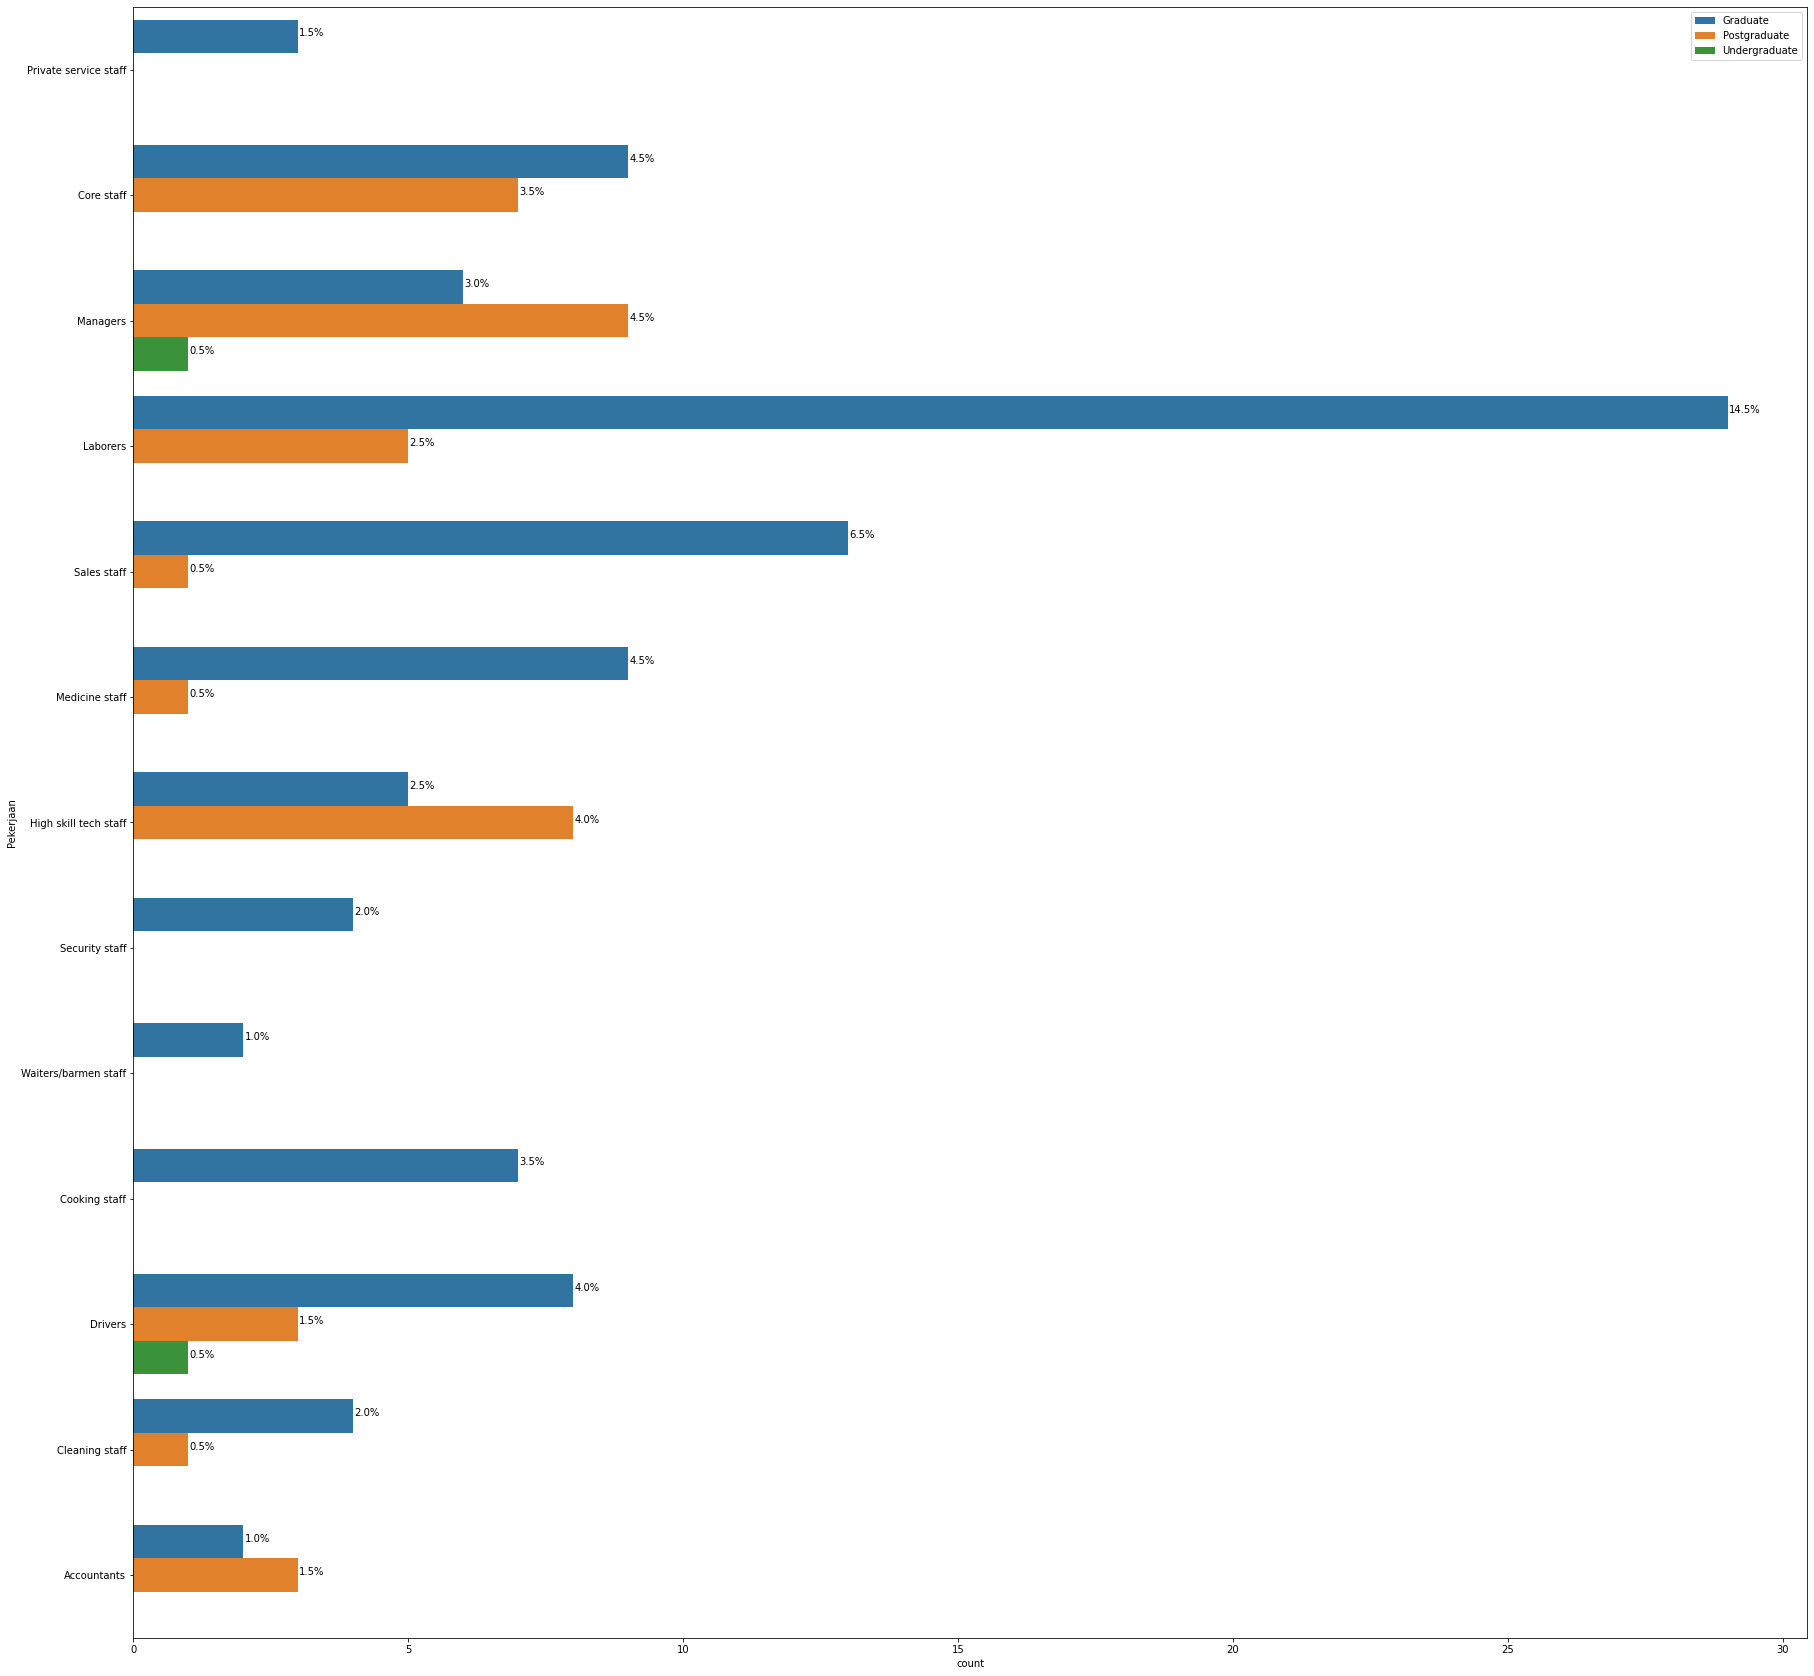

In [ ]:
countplot_occupation(['Pekerjaan'])

In [ ]:
def occupation_by_education_by_gender(occupations, educations, genders, length):
    Gender = []
    Education = []
    Occupation = []
    Percentage = []
    for gender in genders:
        for education in educations:
            for occupation in occupations:
                Gender.append(gender)
                Education.append(education)
                Occupation.append(occupation)
                temp_df_1=df_dtest.loc[df_dtest['Pekerjaan'] == occupation]
                temp_df_2=temp_df_1.loc[temp_df_1['JK'] == gender]
                temp_df_3=temp_df_2.loc[temp_df_2['TingkatPendidikan'] == education]
                length_filter = len(temp_df_3)
                Percentage.append(length_filter/length)
    percent_dict={
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'Popularity Percentage': Percentage
    }
    df = pd.DataFrame(percent_dict)
    df.to_excel('Occupation_popularity_index.xlsx', index=False)
                
                

In [ ]:
occupation_by_education_by_gender(list(df_dtest['Pekerjaan'].unique()), list(df_dtest['TingkatPendidikan'].unique()), list(df_dtest['JK'].unique()), len(df_dtest))

In [ ]:
occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')

In [ ]:
occupation_popularity['Tag'] = occupation_popularity['Gender']+ '_' + occupation_popularity['Education']

In [ ]:
def Dict(data):
    tag_list=list(data['Tag'].unique())
    popular_occupation = []
    data_grouped = data.groupby('Tag')
    for tag in tag_list:
        grouped_data = data_grouped.get_group(tag)
        popular_occupation.append(grouped_data.loc[grouped_data['Popularity Percentage'] == max(list(grouped_data['Popularity Percentage']))]['Occupation'].tolist()[0])
    Tag_dict={
        'Tag': tag_list,
        'Occupation': popular_occupation
    }
    return Tag_dict

In [ ]:
dict_df = Dict(occupation_popularity)

In [ ]:
pd.DataFrame(dict_df).to_excel('Tag_vs_Occupation.xlsx', index=False)

In [ ]:
tag_data = pd.read_excel('Tag_vs_Occupation.xlsx')

In [ ]:
tag_data

,Tag,Occupation
0,Perempuan_Graduate,Laborers
1,Perempuan_Postgraduate,Managers
2,Perempuan_Undergraduate,Private service staff
3,Laki-laki_Graduate,Laborers
4,Laki-laki_Postgraduate,Laborers
5,Laki-laki_Undergraduate,Managers


In [ ]:
tag_g = list(tag_data['Tag'])
occu_g = list(tag_data['Occupation'])
tag_dict = {}
for index in range(len(tag_g)):
    tag_dict[tag_g[index]] = occu_g[index]

In [ ]:
tag_dict

{'Laki-laki_Graduate': 'Laborers',
 'Laki-laki_Postgraduate': 'Laborers',
 'Laki-laki_Undergraduate': 'Managers',
 'Perempuan_Graduate': 'Laborers',
 'Perempuan_Postgraduate': 'Managers',
 'Perempuan_Undergraduate': 'Private service staff'}

In [ ]:
df_dtest['Tag'] = df_dtest['JK']+ '_' + df_dtest['TingkatPendidikan']

In [ ]:
def Replace_nan_occupation(df):
    for key in tag_dict:
        if df['Tag'] == key and pd.isnull(df['Pekerjaan']):
            df['Pekerjaan'] = tag_dict[key]
    return df

In [ ]:
len(df_dtest)

200

In [ ]:
df_dtest = df_dtest.apply(Replace_nan_occupation, axis=1)

In [ ]:
len(df_dtest)

200

In [ ]:
df_dtest.isnull().sum()

Id_customer            0
JK                     0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Pekerjaan              0
JmlAnggotaKeluarga     0
Age                    0
Experience             0
Tag                    0
dtype: int64

In [ ]:
##encoding cagtegorical columns
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(df_dtest[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        df_dtest.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [ ]:
categorical_features = ['JK', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan', 'TingkatPendidikan', 'StatusKeluarga', 'TipeRumah', 'Pekerjaan']
Cat_to_Num(categorical_features)

JK --> {'Laki-laki': 0, 'Perempuan': 1}
KepemilikanMobil --> {'Tidak': 0, 'Ya': 1}
KepemilikanProperti --> {'Tidak': 0, 'Ya': 1}
TipePendapatan --> {'Asosiasi komersial': 0, 'Bekerja': 1, 'PNS': 2, 'Pensioner': 3}
TingkatPendidikan --> {'Graduate': 0, 'Postgraduate': 1, 'Undergraduate': 2}
StatusKeluarga --> {'Belum Menikah': 0, 'Cerai': 1, 'Menikah': 2}
TipeRumah --> {'Apartemen Pribadi': 0, 'Apartemen kantor': 1, 'Rumah orang tua': 2, 'Rumah pribadi': 3, 'Sewa Apartemen': 4}
Pekerjaan --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'High skill tech staff': 5, 'Laborers': 6, 'Managers': 7, 'Medicine staff': 8, 'Private service staff': 9, 'Sales staff': 10, 'Security staff': 11, 'Waiters/barmen staff': 12}


<Figure size 4320x4320 with 0 Axes>

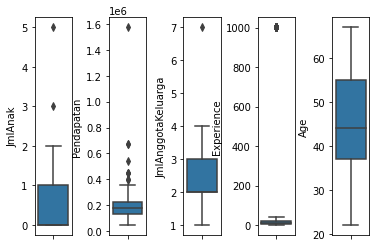

In [ ]:
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 5)
sns.boxplot(y=df_dtest["JmlAnak"], ax=axes[0])
sns.boxplot(y=df_dtest["Pendapatan"], ax=axes[1])
sns.boxplot(y=df_dtest["JmlAnggotaKeluarga"], ax=axes[2])
sns.boxplot(y=df_dtest["Experience"], ax=axes[3])
sns.boxplot(y=df_dtest["Age"], ax=axes[4])
plt.subplots_adjust(wspace=1)

In [ ]:
sc = MinMaxScaler()
df_dtest[['JmlAnak','JmlAnggotaKeluarga','Experience','Pendapatan','Age']] = sc.fit_transform(df_dtest[['JmlAnak','JmlAnggotaKeluarga','Experience','Pendapatan','Age']])
df_dtest.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Tag
0,5142248,1,0,1,0.0,0.116348,2,0,2,3,1,0,0,0,9,0.166667,0.711111,0.005994,Perempuan_Graduate
1,5036925,1,1,1,0.0,0.072165,0,0,2,3,1,1,1,1,3,0.166667,0.244444,0.007992,Perempuan_Graduate
2,5126080,1,0,1,0.2,0.042710,2,0,2,3,1,0,0,0,7,0.333333,0.422222,0.006993,Perempuan_Graduate
3,5088887,1,0,1,0.0,0.081001,1,0,0,4,1,0,0,0,6,0.000000,0.533333,0.001998,Perempuan_Graduate
4,5022156,1,1,1,0.4,0.086892,0,1,2,3,1,0,1,1,7,0.500000,0.222222,0.007992,Perempuan_Postgraduate


In [ ]:
credit_approval_datatest = df_dtest.drop('Id_customer', axis=1, inplace=False)

In [ ]:
credit_approval_datatest = df_dtest.drop('Tag', axis=1, inplace=False)

In [ ]:
credit_approval_datatest

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5142248,1,0,1,0.0,0.116348,2,0,2,3,1,0,0,0,9,0.166667,0.711111,0.005994
1,5036925,1,1,1,0.0,0.072165,0,0,2,3,1,1,1,1,3,0.166667,0.244444,0.007992
2,5126080,1,0,1,0.2,0.042710,2,0,2,3,1,0,0,0,7,0.333333,0.422222,0.006993
3,5088887,1,0,1,0.0,0.081001,1,0,0,4,1,0,0,0,6,0.000000,0.533333,0.001998
4,5022156,1,1,1,0.4,0.086892,0,1,2,3,1,0,1,1,7,0.500000,0.222222,0.007992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5105368,0,0,1,0.0,0.204713,1,0,2,3,1,1,0,0,6,0.166667,0.622222,0.028971
196,5116026,1,0,1,0.0,0.057437,3,0,2,3,1,0,0,0,6,0.166667,0.755556,1.000000
197,5067627,1,0,0,0.2,0.013255,1,0,2,3,1,0,0,0,6,0.333333,0.511111,0.018981
198,5090052,0,1,1,0.0,0.145803,0,1,2,3,1,0,0,0,7,0.166667,0.800000,0.004995


In [ ]:
credit_approval_datatest.describe()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5.082235e+06,0.755000,0.310000,0.695000,0.082000,0.098412,1.215000,0.315000,1.580000,2.900000,1.0,0.22500,0.295000,0.065000,5.930000,0.191667,0.510778,0.187128
std,4.300322e+04,0.431166,0.463654,0.461563,0.144848,0.090710,0.971335,0.507011,0.752617,0.549097,0.0,0.41863,0.457187,0.247144,2.379793,0.149212,0.245457,0.381863
min,5.008912e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.045382e+06,1.000000,0.000000,0.000000,0.000000,0.053756,1.000000,0.000000,1.000000,3.000000,1.0,0.00000,0.000000,0.000000,5.000000,0.166667,0.333333,0.003996
50%,5.089300e+06,1.000000,0.000000,1.000000,0.000000,0.085420,1.000000,0.000000,2.000000,3.000000,1.0,0.00000,0.000000,0.000000,6.000000,0.166667,0.488889,0.007992
75%,5.117014e+06,1.000000,1.000000,1.000000,0.200000,0.116348,1.000000,1.000000,2.000000,3.000000,1.0,0.00000,1.000000,0.000000,7.000000,0.333333,0.733333,0.019980
max,5.150020e+06,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,4.000000,1.0,1.00000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000


Test Model 1

In [ ]:
y_pred_dt = DT_model.predict(credit_approval_datatest)

In [ ]:
y_pred_dt

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0])

Test Model 2

In [ ]:
df_final['Credit_Status'].value_counts()

0    31345
1     4047
Name: Credit_Status, dtype: int64

In [ ]:
df_final.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Tag,Credit_Status
0,5008804,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,Laki-laki_Postgraduate,1
1,5008805,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,Laki-laki_Postgraduate,1
2,5008805,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988,Laki-laki_Postgraduate,1
3,5008806,0,1,1,0.0,0.175824,1,0,2,3,1,0,0,0,16,0.333333,0.791667,0.002997,Laki-laki_Graduate,0
4,5008808,1,0,1,0.0,0.496337,0,0,0,3,1,0,1,1,14,0.000000,0.645833,0.007992,Perempuan_Graduate,0


In [ ]:
df_final_app = df_final[df_final['Credit_Status']=='0']

In [ ]:
df_final_notapp = df_final[df_final['Credit_Status']=='1']
df_final_notapp.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Tag,Credit_Status


In [ ]:
print(df_final.shape)
print(df_final_app.shape)
print(df_final_notapp.shape)

(35392, 20)
(0, 20)
(0, 20)


In [ ]:
X = df_final
Y = df_final['Credit_Status']

In [ ]:
X.drop(['Tag','Credit_Status'],axis=1,inplace=False)

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5008804,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988
1,5008805,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988
2,5008805,0,1,1,0.0,0.816850,1,1,2,4,1,1,0,0,10,0.333333,0.250000,0.011988
3,5008806,0,1,1,0.0,0.175824,1,0,2,3,1,0,0,0,16,0.333333,0.791667,0.002997
4,5008808,1,0,1,0.0,0.496337,0,0,0,3,1,0,1,1,14,0.000000,0.645833,0.007992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35387,5149828,0,1,1,0.0,0.587912,1,0,2,3,1,0,0,0,10,0.333333,0.562500,0.006993
35388,5149834,1,0,1,0.0,0.267399,0,1,2,3,1,0,1,1,11,0.333333,0.270833,0.003996
35389,5149838,1,0,1,0.0,0.267399,4,1,2,3,1,0,1,1,11,0.333333,0.270833,0.003996
35390,5150049,1,0,1,0.0,0.523810,1,0,2,3,1,0,0,0,14,0.333333,0.583333,0.001998


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 4047), (1, 4047)] (8094,)


In [ ]:
X_resampled.head(5)

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Tag,Credit_Status
0,5029463,1,1,1,0.5,0.175824,0,1,2,3,1,0,0,1,3,0.666667,0.166667,0.007992,Perempuan_Postgraduate,0
1,5139377,1,1,0,0.0,0.011053,4,0,2,3,1,0,0,0,8,0.333333,0.833333,1.000000,Perempuan_Graduate,0
2,5146205,1,1,1,0.5,0.358974,1,0,2,3,1,0,0,0,14,0.666667,0.145833,0.005994,Perempuan_Graduate,0
3,5029043,1,0,1,0.0,0.130037,4,0,2,3,1,0,0,0,8,0.333333,0.895833,1.000000,Perempuan_Graduate,0
4,5066605,1,0,1,0.0,0.120879,4,0,2,3,1,0,0,0,8,0.333333,0.791667,1.000000,Perempuan_Graduate,0


In [ ]:
y_resampled.shape

(8094,)

In [ ]:
X_resampled.shape

(8094, 20)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = X_resampled.drop(['Tag','Credit_Status'], axis=1)
y = y_resampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.head(5)

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5029463,1,1,1,0.5,0.175824,0,1,2,3,1,0,0,1,3,0.666667,0.166667,0.007992
1,5139377,1,1,0,0.0,0.011053,4,0,2,3,1,0,0,0,8,0.333333,0.833333,1.000000
2,5146205,1,1,1,0.5,0.358974,1,0,2,3,1,0,0,0,14,0.666667,0.145833,0.005994
3,5029043,1,0,1,0.0,0.130037,4,0,2,3,1,0,0,0,8,0.333333,0.895833,1.000000
4,5066605,1,0,1,0.0,0.120879,4,0,2,3,1,0,0,0,8,0.333333,0.791667,1.000000


In [ ]:
X_train.shape

(5665, 18)

In [ ]:
X_test.shape

(2429, 18)

In [ ]:
y_train.shape

(5665,)

In [ ]:
y_test.shape

(2429,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
new_DT_model = DecisionTreeClassifier()

In [ ]:
new_DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = new_DT_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6566488266776451

In [ ]:
from sklearn.metrics import f1_score

print('F1 Score: ',f1_score(y_test, y_pred, average='macro'))

F1 Score:  0.6566278171019445


In [ ]:
y_pred_dt = new_DT_model.predict(credit_approval_datatest)

In [ ]:
y_pred_dt

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1])

In [ ]:
df_result = df_dtest[['Id_customer']]

In [ ]:
df_result['value'] = y_pred_dt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_result.sample(20)

,Id_customer,value
61,5029213,1
58,5009292,1
49,5053078,1
84,5009428,1
142,5139823,1
6,5139764,0
39,5143250,1
150,5038723,1
117,5095061,0
127,5091361,0


In [ ]:
df_result['value'].value_counts()

0    118
1     82
Name: value, dtype: int64